##Redes Neurais Multicamadas utilizando Python e a biblioteca de Deep Learning Keras, uma das mais populares atualmente.

- Keras é uma biblioteca de Redes Neurais, capaz de rodar com o TensorFlow (não apenas), e que foi desenvolvida pensando em possibilitar uma fácil e rápida prototipação.

- Redes Neurais Multicamadas são aqueles nas quais os neurônios estão estruturados em duas ou mais camadas (layers) de processamento (já que no mínimo haverá 1 layer de entrada e 1 layer de saída).

## Vamos implementar um Rede simples, vamos pegar o super-conhecido problema de classificação MNIST e ver o desempenho do nosso algoritmo quando submetido a esse dataset com 70.000 imagens!

- Iremos usar a arquitetura Rede Neural Feedforward

In [ ]:
## importar as bibliotecas necessárias

from sklearn.datasets import fetch_openml #as fetch_mldata
import matplotlib.pyplot as plt
import numpy as np

## importar o conjunto de dados MNIST

- https://en.wikipedia.org/wiki/MNIST_database 


In [ ]:
dataset = fetch_openml("mnist_784")
(data, labels) = (dataset.data, dataset.target)

## Exibir algumas informações do dataset MNIST


In [ ]:
print("[INFO] Número de imagens: {}".format(data.shape[0]))
print("[INFO] Pixels por imagem: {}".format(data.shape[1]))

[INFO] Número de imagens: 70000
[INFO] Pixels por imagem: 784


## escolher um índice aleatório do dataset e exibir
## a imagem e label correspondente


[INFO] Imagem aleatória do MNIST com label : 8


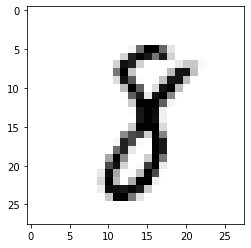

In [ ]:
np.random.seed(17)
randomIndex = np.random.randint(0, data.shape[0])
print("[INFO] Imagem aleatória do MNIST com label :", labels[randomIndex])
plt.imshow(data[randomIndex].reshape((28,28)), cmap="Greys")
plt.show()

##Implementando nossa Rede Neural com Python + Keras

In [ ]:
# importar os pacotes necessários
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

## normalizar todos pixels, de forma que os valores estejam
## no intervalor [0, 1.0]

In [ ]:
data = dataset.data.astype("float") / 255.0
labels = dataset.target

labels

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

##Nesta etapa de preparação dos nossos dados, será preciso também converter os labels – que são representados por números inteiros – para o formato de vetor binário. Para exemplificar o que é um vetor binário, veja o exemplo abaixo, que indica o label ‘4’.



In [ ]:
# dividir o dataset entre train (75%) e test (25%)
(trainX, testX, trainY, testY) = train_test_split(data, dataset.target)

## converter labels de inteiros para vetores


In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

##Com o dataset importado e processado da maneira correta, a gente pode finalmente definir a arquitetura da nossa Rede Neural com o Keras.

##De maneira totalmente arbitrária, defini que a Rede Neural terá 4 layers:

- O nosso primeiro layer (l0) receberá como input os valores relativos a cada pixel das imagens. Ou seja, como cada imagem possui tamanho igual a 28 X 28 pixels, l0 terá 784 neurônios.

- Os hidden layers l1 e l2 terão arbitrariamente 128 e 64 neurônios.  

- Por fim,  a última camada, l3, terá a quantidade de neurônios correspondente à quantidade de classes que o nosso problema de classificação possui: 10 (lembrando, são 10 dígitos possíveis).

In [ ]:
# definir a arquitetura da Rede Neural usando Keras
# 784 (input) =&gt; 128 (hidden) =&gt; 64 (hidden) =&gt; 10 (output)

model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

##Dentro do conceito de arquitetura feedforward, a nossa Rede Neural é instanciada pela classe Sequential, o que quer dizer que cada camada será “empilhada” sobre outra, com o output de uma sendo o input da próxima. No nosso exemplo, todos layers são do tipo fully-connected layer.

##Os hidden layers serão ativados pela função sigmoid, que recebe os valores reais dos neurônios como input e os joga dentro do range [0, 1]. Já para a última camada, como essa tem que refletir as probabilidades para cada uma das classes possíveis, será utilizada a função softmax.


##Para treinar nosso modelo, vou usar o algoritmo mais importante para as Redes Neurais: Stochastic Gradient Descent (SGD)

##A learning rate do SGD será igual a 0.01, e a loss function será acategorical_crossentropy, uma vez que o número de classes do output é maior que dois.



In [ ]:
# treinar o modelo usando SGD (Stochastic Gradient Descent)
print("[INFO] treinando a rede neural...")
model.compile(optimizer=SGD(0.01), loss="categorical_crossentropy", metrics=["accuracy"])
H = model.fit(trainX, trainY, batch_size=128, epochs=10, verbose=2, validation_data=(testX, testY))

[INFO] treinando a rede neural...
Epoch 1/10
411/411 - 1s - loss: 2.2881 - accuracy: 0.1732 - val_loss: 2.2613 - val_accuracy: 0.2138
Epoch 2/10
411/411 - 1s - loss: 2.2374 - accuracy: 0.2938 - val_loss: 2.2119 - val_accuracy: 0.3859
Epoch 3/10
411/411 - 1s - loss: 2.1811 - accuracy: 0.4257 - val_loss: 2.1461 - val_accuracy: 0.4447
Epoch 4/10
411/411 - 1s - loss: 2.1050 - accuracy: 0.4830 - val_loss: 2.0568 - val_accuracy: 0.5630
Epoch 5/10
411/411 - 1s - loss: 2.0006 - accuracy: 0.5410 - val_loss: 1.9347 - val_accuracy: 0.5379
Epoch 6/10
411/411 - 1s - loss: 1.8656 - accuracy: 0.5668 - val_loss: 1.7854 - val_accuracy: 0.5707
Epoch 7/10
411/411 - 1s - loss: 1.7091 - accuracy: 0.5992 - val_loss: 1.6233 - val_accuracy: 0.6065
Epoch 8/10
411/411 - 1s - loss: 1.5479 - accuracy: 0.6336 - val_loss: 1.4641 - val_accuracy: 0.6518
Epoch 9/10
411/411 - 1s - loss: 1.3965 - accuracy: 0.6690 - val_loss: 1.3200 - val_accuracy: 0.6953
Epoch 10/10
411/411 - 1s - loss: 1.2626 - accuracy: 0.7045 - val_l

## avaliar a Rede Neural


In [ ]:
print("[INFO] avaliando a rede neural...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1)))

[INFO] avaliando a rede neural...
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1729
           1       0.68      0.98      0.80      1990
           2       0.74      0.72      0.73      1728
           3       0.65      0.81      0.72      1776
           4       0.76      0.52      0.62      1734
           5       0.80      0.30      0.44      1588
           6       0.79      0.86      0.83      1751
           7       0.72      0.90      0.80      1815
           8       0.83      0.33      0.47      1680
           9       0.57      0.64      0.60      1709

    accuracy                           0.71     17500
   macro avg       0.73      0.70      0.69     17500
weighted avg       0.73      0.71      0.69     17500



## plotar loss e accuracy para os datasets 'train' e 'test'


ValueError: ignored

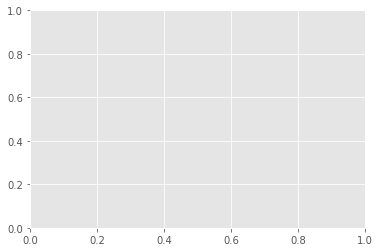

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0,100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()